![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and Pedro Angelo Medeiros Fonini
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Para fazer todas as combinações de tamanho fixo de uma lista
from itertools import combinations

In [3]:
#Muda o tema do plot (usar no jupy):
from jupyterthemes import jtplot as jt
jt.style(theme="gruvboxd")

# Encontrando regressores

Neste teste, vamos "encontrar agulhas num palheiro":
dados os pontos $(x_i, w_i)$, e um conjunto de funções $\phi_j$,
queremos encontrar os coeficientes $a_j$ para a regressão

$$ w_i \sim \sum_{j=1}^J a_j \phi_j(x_i). $$

A diferença é que o conjunto $\{\phi_j\}$ tem muitas funções,
e daí usar diretamente uma regressão não seria satisfatório.

### Escreva uma função que faz regressão linear no formato do modelo acima

In [4]:
def regress(xs, ws, phis):
    """Regressão linear dos pontos  (xs,ys)  para a base de funções dada pela lista  phis."""
    matriz = phis[0](xs)
    for k in range(1,len(phis)):
        matriz = np.column_stack((matriz,phis[k](xs)))
    coefs,*_ = np.linalg.lstsq(matriz,ws,rcond=None)
    return coefs
    
def regress_with_error(xs, ws, phis):
    """Regressão linear dos pontos  (xs,ys)  para a base de funções dada pela lista  phis,
    retornando os coeficientes e o erro da regressão."""
    matriz = phis[0](xs)
    for k in range(1,len(phis)):
        matriz = np.column_stack((matriz,phis[k](xs)))
    coefs,resi,_,_ = np.linalg.lstsq(matriz,ws,rcond=None)
    return coefs,resi

## Dados

In [5]:
xs = np.linspace(-1,4, num=31)
ws = [ 2.3878312997930564, 1.155719237816545,    0.8304521376105308,  0.214854643069387,   0.6728092133806185,
      -0.6280275654328286, 1.377924705686592,    1.1167241027129722,  2.344350908627618,   2.561444862667869,
       3.043330261390043,  0.7760803883397547,   0.2665848037665528, -0.8241488666459598, -0.7210502793271428,
      -1.390249808068572, -0.20641373647700376,  0.5808680348262225,  1.944189557940707,   2.9016628727766918,
       2.70801610206377,   3.890210372418954,    3.889547340008677,   3.533625237717624,   3.053154568048924,
       1.2893557188865823, 0.07298255483249554, -1.6033295792649078, -2.130291144426305,  -1.7387666939149622,
      -1.3048246939322563
     ]

## Uma base de funções trigonométricas

Vamos tentar ajustar um modelo com senos e cossenos para os dados $(x_i, w_i)$

In [6]:
trigs = [lambda x, k=k: np.sin(k*x) for k in range(1,8)] + [lambda x, k=k: np.cos(k*x) for k in range(8)]

## Questão 1: Regressão com todas as funções da base

Suponha que você pode usar todas as funções da base `trigs`.
Calcule os coeficientes da regressão correspondentes aos dados `xs, ws`.

In [7]:
coefs = regress(xs, ws, trigs)
assert len(coefs) == len(trigs)

Agora, faça um gráfico dos coeficientes, do maior para o menor (em valor absoluto).

In [8]:
#Definindo funções Úteis
def find_indices(lista,N):
    sorteada = np.sort(lista)[0:N]
    indices = [lista.tolist().index(k) for k in sorteada[0:N]]
    return sorteada,indices
def find_bases(indices):
    """Retorna as  N bases de phi em ordem crescente"""
    bases=[]
    for k in indices:
        if type(k) == int:
            if k <= 6:
                bases.append(f"Sin({k+1}x)")
            else:
                bases.append(f"Cos({k-7}x)")
        else:
            j=[]
            for i in k:
                if i <= 6:
                    j.append(f"Sin({i+1})")
                else:
                    j.append(f"Cos({i-7})")
            bases.append(j)
    return bases

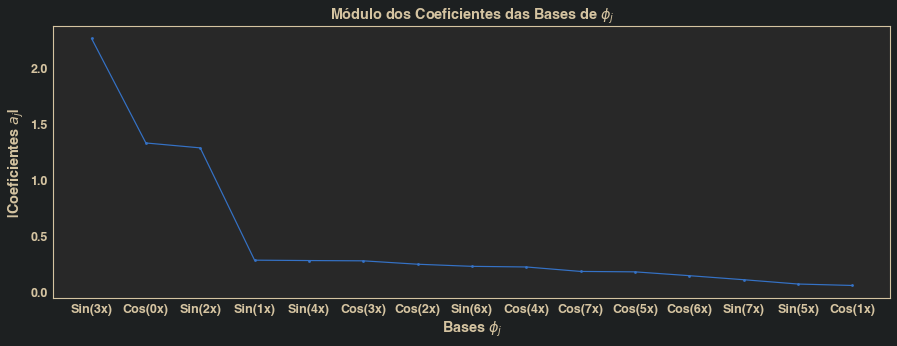

In [9]:
#Dados
coef = np.abs(regress(xs, ws, trigs))
y1 , indices1 = find_indices(coef,len(coef))
x1 = find_bases(indices1)
#plot
plt.figure(figsize=(15,5))
plt.plot(np.arange(len(y1)),y1,marker=".")
#Eixos
plt.xlabel("Bases $\phi_j$")
plt.ylabel("|Coeficientes $a_j$|")
plt.xticks(np.arange(len(y1)),x1)
plt.title("Módulo dos Coeficientes das Bases de $\phi_j$")
plt.grid();
ax = plt.gca()
ax.invert_xaxis()

Quais são as funções com maior peso para explicar os dados `xs, ws`?

(Se preciso, rode código na primeira caixa, e depois explique / complete em texto a seguir)

In [10]:
print(f'As Funções com peso mais significativo são:{x1[::-1][0],x1[::-1][1],x1[::-1][2]}')

As Funções com peso mais significativo são:('Sin(3x)', 'Cos(0x)', 'Sin(2x)')


### Regressão nos 3 maiores

Agora, use as três funções da base que possuem os maiores coeficientes,

e calcule os coeficientes da regressão apenas nesse sub-espaço de dimensão 3.

In [11]:
# Dê sua resposta, por exemplo, como coefs_3 = ...
trigs_3=[lambda x: np.sin(3*x)] + [lambda x: np.cos(0*x)] + [lambda x: np.sin(2*x)]
coefs_3,errs_3=regress_with_error(xs,ws,trigs_3)
print(f'Coeficientes = {coefs_3}',f' Norma² do vetor resíduo = {errs_3}')

Coeficientes = [ 2.03341432  1.19848924 -1.18054086]  Norma² do vetor resíduo = [7.09976465]


Quão diferentes são estes coeficientes dos que você achou usando todas as funções?

(Novamente, faça contas, e depois comente)

In [12]:
coefs_max = [coefs[2],coefs[7],coefs[1]]
err_rel = [np.abs((coefs_3[k]-coefs_max[k])/coefs_max[k]) for k in range(3)]
porcentagem = [err_rel[k]*100 for k in range(3)]
print(f'Coeficientes com 03 bases: a1 = {coefs_3[0]:.10f}, a2 = {coefs_3[1]:.10f}, a3 = {coefs_3[2]:.10f}')
print(f'Coeficientes com 15 bases: a1 = {coefs_max[0]:.10f}, a2 = {coefs_max[1]:.10f}, a3 = {coefs_max[2]:.10f}')
print(f'Erro relativo:{"":12} erro = {porcentagem[0]:.2f}% {"":3}, erro = {porcentagem[1]:.2f}% {"":3}, erro = {porcentagem[2]:.2f}%')

Coeficientes com 03 bases: a1 = 2.0334143209, a2 = 1.1984892433, a3 = -1.1805408642
Coeficientes com 15 bases: a1 = 2.2644590070, a2 = 1.3325973141, a3 = -1.2887979588
Erro relativo:             erro = 10.20%    , erro = 10.06%    , erro = 8.40%


São relativamente pouco diferentes, mas devido a suas proximidades bem parecidadas podemos dizer que a base de 3 funções aproxima bem os 3 coeficientes de regressão e que o salto de 3 para 15 bases causa um aumento de precisão nesses coeficientes em torno de 10%.

## Questão 2: Sub-bases

Agora, encontre os coeficientes $a_j^I$ e os erros $\epsilon_j^I$ para todas as possíveis escolhas $I$
de 4 funções dentre as do conjunto $\{\phi_j\}$.

In [13]:
%%time
phis_4 = list(combinations(trigs,4))
coef_4 = [regress_with_error(xs, ws, phis)[0] for phis in phis_4]
errs_4 = [regress_with_error(xs, ws, phis)[1] for phis in phis_4]
errs_4 = np.array(errs_4)

Wall time: 436 ms


Quais são as 10 combinações de funções que produzem os menores erros?
Quais são os erros correspondentes?

In [14]:
errs_4T = errs_4.ravel()
sorteada_4, Inds_4 = find_indices(errs_4T,10)  
generica_4 = list(combinations(range(15),4))
indices_base_4 = np.array([generica_4[k] for k in Inds_4])
base_4 = find_bases(indices_base_4)
for i in range(10):
    print(f"A {i+1: 3d}º combinação de função é {base_4[i]} que tem a Norma² do vetor resíduo = {sorteada_4[i]:.10f}")

A   1º combinação de função é ['Sin(2)', 'Sin(3)', 'Cos(0)', 'Cos(5)'] que tem a Norma² do vetor resíduo = 4.3407390059
A   2º combinação de função é ['Sin(2)', 'Sin(3)', 'Cos(0)', 'Cos(3)'] que tem a Norma² do vetor resíduo = 6.6337439910
A   3º combinação de função é ['Sin(2)', 'Sin(3)', 'Sin(4)', 'Cos(0)'] que tem a Norma² do vetor resíduo = 6.7039026098
A   4º combinação de função é ['Sin(2)', 'Sin(3)', 'Sin(6)', 'Cos(0)'] que tem a Norma² do vetor resíduo = 6.8737518109
A   5º combinação de função é ['Sin(2)', 'Sin(3)', 'Sin(5)', 'Cos(0)'] que tem a Norma² do vetor resíduo = 6.9106861399
A   6º combinação de função é ['Sin(2)', 'Sin(3)', 'Cos(0)', 'Cos(7)'] que tem a Norma² do vetor resíduo = 6.9347696139
A   7º combinação de função é ['Sin(2)', 'Sin(3)', 'Sin(7)', 'Cos(0)'] que tem a Norma² do vetor resíduo = 7.0779004196
A   8º combinação de função é ['Sin(1)', 'Sin(2)', 'Sin(3)', 'Cos(0)'] que tem a Norma² do vetor resíduo = 7.0791969006
A   9º combinação de função é ['Sin(2)',

Estes erros sugerem que uma base é "muito melhor" do que as outras?
Porquê?

Podemos ver que o "erro" da primeira base tem uma diferença de mesma ordem de grandeza para a segunda e que todas as outras bases tem diferenças de no máximo 1 ordem de grandeza abaixo(enquanto o primeiro tem erros na unidade os outros tem erros decimais) o que sugere que a primeira base da lista acima é "muito melhor" do que as outras já que ela é a que tem, sem dúvidas, o menor "erro".

## Questão 3: Comparando

Dê, abaixo, uma função que retorna a função correspondente aos coeficientes e à base escolhida.

In [15]:
def reconstruct(coefs, base):
    def aux(x):
        b=np.array([base[i](x) for i in range(len(base))])
        func=np.sum(coefs*b.T,axis=1)
        return func
    return aux

In [16]:
f = reconstruct([1.1, -0.5], [np.exp, trigs[3]])
ts = np.linspace(0,1)
ys = f(ts)
assert len(ys) == len(ts)
assert ys[0] == 1.1
assert ys[-1] == 3.368511258958914

Faça, abaixo, um gráfico comparando
- os dados
- a solução `coefs` correspondente à base completa
- a solução com a base de tamanho 3 dos maiores coeficientes
- a solução com a "melhor base" de tamanho 4

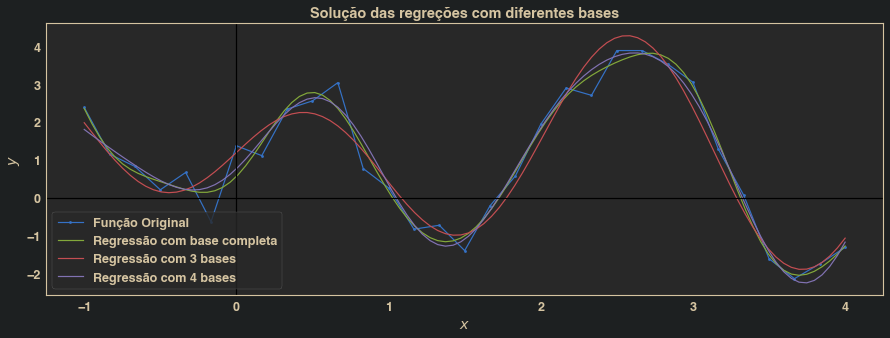

In [17]:
xs1 = np.linspace(-1,4, num=100)
#Função Original
plt.figure(figsize=(15,5))
plt.plot(xs,ws,label="Função Original",marker=".")

#Função Com 15 bases
coefs_c = regress(xs, ws, trigs)
base_c = [trigs[i] for i in range(len(coefs))]
f_c = reconstruct(coefs_c,base_c)
plt.plot(xs1,f_c(xs1),label="Regressão com base completa")

#Função Com 3 bases
coefs_3 = regress(xs, ws, trigs_3)
base_3 = trigs_3
f_3 = reconstruct(coefs_3,base_3)
plt.plot(xs1,f_3(xs1),label="Regressão com 3 bases")

#Função Com 4 bases
coefs_4 = coef_4[406]
base_4 = phis_4[406]
f_4 = reconstruct(coefs_4,base_4)
plt.plot(xs1,f_4(xs1),label="Regressão com 4 bases")

#Eixos
plt.title("Solução das regreções com diferentes bases")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc="lower left")
plt.axhline(color="black")
plt.axvline(color="black")
plt.grid();


O que você observa?

Podemos ver que há sim uma siginficativa melhora em aproximar uma função ao comportamento dos pontos da função original ao se aumentar o número de bases da regressão. Podemos ver tambem que a diferença vai diminuindo, ou seja, a solução com 4 bases não tem uma diferença tão visual em comparação com a solução com bases completas, o que faz sentido já que o ganho de precisão não deveria mudar completamente o comportamento já que os coeficientes dessas novas bases não tem um impacto significativo como visto na questão 1.

### Bônus: E se tivéssemos incluído um grau de liberdade a mais?

Repita a análise anterior, agora percorrendo todas as combinações de 5 funções para a base.
O que você observa?

In [18]:
%%time

# Cálculos das C(15,5) regressões
phis_5 = list(combinations(trigs,5))
coef_5 = [regress_with_error(xs, ws, phis)[0] for phis in phis_5]
errs_5 = [regress_with_error(xs, ws, phis)[1] for phis in phis_5]
errs_5 = np.array(errs_5)


Wall time: 1.16 s


In [19]:
# Análise
errs_5T = errs_5.ravel()
sorteada_5, Inds_5 = find_indices(errs_5T,10)  
generica_5 = list(combinations(range(15),5))
indices_base_5 = np.array([generica_5[k] for k in Inds_5])
base_5 = find_bases(indices_base_5)
for i in range(10):
    print(f"A {i+1: 3d}º combinação de função é {base_5[i]} que tem a Norma² do vetor resíduo = {sorteada_5[i]:.8f}")

A   1º combinação de função é ['Sin(2)', 'Sin(3)', 'Sin(5)', 'Cos(0)', 'Cos(5)'] que tem a Norma² do vetor resíduo = 4.11326154
A   2º combinação de função é ['Sin(2)', 'Sin(3)', 'Cos(0)', 'Cos(3)', 'Cos(5)'] que tem a Norma² do vetor resíduo = 4.26908470
A   3º combinação de função é ['Sin(1)', 'Sin(2)', 'Sin(3)', 'Cos(0)', 'Cos(5)'] que tem a Norma² do vetor resíduo = 4.29984213
A   4º combinação de função é ['Sin(2)', 'Sin(3)', 'Sin(4)', 'Cos(0)', 'Cos(5)'] que tem a Norma² do vetor resíduo = 4.31559463
A   5º combinação de função é ['Sin(2)', 'Sin(3)', 'Cos(0)', 'Cos(1)', 'Cos(5)'] que tem a Norma² do vetor resíduo = 4.32185761
A   6º combinação de função é ['Sin(2)', 'Sin(3)', 'Cos(0)', 'Cos(5)', 'Cos(7)'] que tem a Norma² do vetor resíduo = 4.32675396
A   7º combinação de função é ['Sin(2)', 'Sin(3)', 'Sin(7)', 'Cos(0)', 'Cos(5)'] que tem a Norma² do vetor resíduo = 4.32766429
A   8º combinação de função é ['Sin(2)', 'Sin(3)', 'Cos(0)', 'Cos(4)', 'Cos(5)'] que tem a Norma² do vet

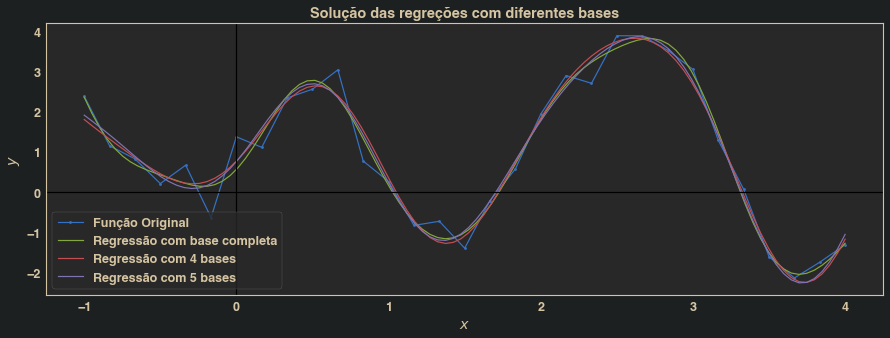

In [20]:
xs1 = np.linspace(-1,4, num=100)
#Função Original
plt.figure(figsize=(15,5))
plt.plot(xs,ws,label="Função Original",marker=".")

#Função Com 15 bases
coefs_c = regress(xs, ws, trigs)
base_c = [trigs[i] for i in range(len(coefs))]
f_c = reconstruct(coefs_c,base_c)
plt.plot(xs1,f_c(xs1),label="Regressão com base completa")

#Função Com 4 bases
coefs_4 = coef_4[406]
base_4 = phis_4[406]
f_4 = reconstruct(coefs_4,base_4)
plt.plot(xs1,f_4(xs1),label="Regressão com 4 bases")

#Função Com 5 bases
coefs_5 = coef_5[1077]
base_5 = phis_5[1077]
f_5 = reconstruct(coefs_5,base_5)
plt.plot(xs1,f_5(xs1),label="Regressão com 5 bases")

#Eixos
plt.title("Solução das regreções com diferentes bases")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.axhline(color="black")
plt.axvline(color="black")
plt.grid();


Comente abaixo

Podemos ver que a solução confirma nossa suposição de que aumentando a base a aproximação melhora porem devemos tambem observar que o ganho de precisão se torna cada vez menor para um aumento de complexidade da solução de regressão e um aumento de tempo e exforço computacional. Devemos então avaliar se é realmente necessário aumentar as bases para melhorar a precisão ou se já estamos fazendo um "overfit" da solução, o que devemos evitar. 